In [54]:
import json
import pandas as pd
import os

# --- Define the path to our data ---
COMPETITION_NAME = 'fds-pokemon-battles-prediction-2025'
DATA_PATH = os.path.join('../input', COMPETITION_NAME)

train_file_path = os.path.join(DATA_PATH, 'train.jsonl')
test_file_path = os.path.join(DATA_PATH, 'test.jsonl')
train_data = []

#LOADING TRAIN 
# Read the file line by line
print(f"Loading data from '{train_file_path}'...")
try:
    with open(train_file_path, 'r') as f:
        for line in f:
            # json.loads() parses one line (one JSON object) into a Python dictionary
            train_data.append(json.loads(line))

    print(f"Successfully loaded {len(train_data)} battles.")

    # Let's inspect the first battle to see its structure
    print("\n--- Structure of the first train battle: ---")
    if train_data:
        first_battle = train_data[0]
        
        # To keep the output clean, we can create a copy and truncate the timeline
        battle_for_display = first_battle.copy()
        battle_for_display['battle_timeline'] = battle_for_display.get('battle_timeline', [])[:2] # Show first 2 turns
        
        # Use json.dumps for pretty-printing the dictionary
        print(json.dumps(battle_for_display, indent=4))
        if len(first_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")


except FileNotFoundError:
    print(f"ERROR: Could not find the training file at '{train_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")

Loading data from '../input/fds-pokemon-battles-prediction-2025/train.jsonl'...
Successfully loaded 10000 battles.

--- Structure of the first train battle: ---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",

In [55]:
#LOADING TEST

test_data = []

print(f"\nLoading test data from '{test_file_path}'...")
try:
    with open(test_file_path, 'r') as f:
        for line in f:
            test_data.append(json.loads(line))
    print(f"Loaded {len(test_data)} test battles.")

except FileNotFoundError:
    print(f"ERROR: test file not found at '{test_file_path}'")


print("\n--- First train battle structure:---")
if train_data:
    first_battle = dict(train_data[0])
    first_battle["battle_timeline"] = first_battle.get("battle_timeline", [])[:2]
    print(json.dumps(first_battle, indent=4))


Loading test data from '../input/fds-pokemon-battles-prediction-2025/test.jsonl'...
Loaded 5000 test battles.

--- First train battle structure:---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",
           

In [56]:
from io import StringIO

csv_data = """Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1,1,1,1,1,1,1,1,1,1,1,0.5,0,1,1,0.5,1
Fire,1,0.5,0.5,1,2,2,1,1,1,1,1,2,0.5,1,0.5,1,2,1
Water,1,2,0.5,1,0.5,1,1,1,2,1,1,1,2,1,0.5,1,1,1
Electric,1,1,2,0.5,0.5,1,1,1,0,2,1,1,1,1,0.5,1,1,1
Grass,1,0.5,2,1,0.5,1,1,0.5,2,0.5,1,0.5,2,1,0.5,1,0.5,1
Ice,1,0.5,0.5,1,2,0.5,1,1,2,2,1,1,1,1,2,1,0.5,1
Fighting,2,1,1,1,1,2,1,0.5,1,0.5,0.5,0.5,2,0,1,2,2,0.5
Poison,1,1,1,1,2,1,1,0.5,0.5,1,1,1,0.5,0.5,1,1,0,2
Ground,1,2,1,2,0.5,1,1,2,1,0,1,0.5,2,1,1,1,2,1
Flying,1,1,1,0.5,2,1,2,1,1,1,1,2,0.5,1,1,1,0.5,1
Psychic,1,1,1,1,1,1,2,2,1,1,0.5,1,1,1,1,0,0.5,1
Bug,1,0.5,1,1,2,1,0.5,0.5,1,0.5,2,1,1,0.5,1,2,0.5,0.5
Rock,1,2,1,1,1,2,0.5,1,0.5,2,1,2,1,1,1,1,0.5,1
Ghost,0,1,1,1,1,1,1,1,1,1,2,1,1,2,1,0.5,1,1
Dragon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0.5,0
Dark,1,1,1,1,1,1,0.5,1,1,1,2,1,1,2,1,0.5,1,0.5
Steel,1,0.5,0.5,0.5,1,2,1,1,1,1,1,1,2,1,1,1,0.5,2
Fairy,1,0.5,1,1,1,1,2,0.5,1,1,1,1,1,1,2,2,0.5,1
"""

type_chart_df = pd.read_csv(StringIO(csv_data))
display(type_chart_df)

#l'idea è: in una battaglia il numero di mosse efficaci è determinante
#per ogni battaglia, per ogni mossa del team 1 e per ogni mossa del team 2 devo controllare nella type_chart l'effectiveness. 
#Poi stampo effectiveness dei due team


########################Codice ripreso#####################################
from collections import defaultdict

dataset_types = defaultdict(set)

for battle in train_data:
    #P1 pokémons, 6
    for p in battle.get("p1_team_details", []):
        name = p.get("name", "").lower()
        for t in p.get("types", []):
            if t != "notype" and t:
                dataset_types[name].add(t.lower())

    #P2 lead pokémon
    lead = battle.get("p2_lead_details", {})
    name = lead.get("name", "").lower()
    for t in lead.get("types", []):
        if t != "notype" and t:
            dataset_types[name].add(t.lower())
            
    #P2 pokémons appeared in the battle_timeline
    for turn in battle.get("battle_timeline", []):
        p2_state = turn.get("p2_pokemon_state", {})
        name = p2_state.get("name", "").lower()
        if name:
            pass #no types rn

types_dict = {name: sorted(list(types)) for name, types in dataset_types.items()}

print("All pokèmon names and relative types:\n")
for name, types in sorted(types_dict.items()):
    print(f"{name}: {types}")

all_types = sorted({t for types in types_dict.values() for t in types})

print(f"\nTot number of found pokémon types: {len(all_types)}")
print("Types:", ", ".join(all_types))


############################################################################

def compute_real_effectiveness(battle, type_chart_df, dataset_types):
    p1_super = 0
    p2_super = 0
    p1_null = 0
    p2_null = 0
    p1_half = 0
    p2_half = 0
    p1_total = 0
    p2_total = 0

    for turn in battle.get("battle_timeline", []):
        # --- Player 1 move ---
        p1_move = turn.get("p1_move_details")
        if p1_move:
            p1_total += 1
            move_type = p1_move.get("type", "").capitalize()
            defender_name = turn.get("p2_pokemon_state", {}).get("name", "").lower()
            defender_types = dataset_types.get(defender_name, [])

            for def_type in defender_types:
                def_type = def_type.capitalize()
                if move_type in type_chart_df.index and def_type in type_chart_df.columns:
                    eff = type_chart_df.loc[move_type, def_type]
                    if eff == 2.0:
                        p1_super += 1
                    elif eff == 0.5:
                        p1_half += 1
                    elif eff == 0:
                        p1_null += 1

        # --- Player 2 move ---
        p2_move = turn.get("p2_move_details")
        if p2_move:
            p2_total += 1
            move_type = p2_move.get("type", "").capitalize()
            defender_name = turn.get("p1_pokemon_state", {}).get("name", "").lower()
            defender_types = dataset_types.get(defender_name, [])

            for def_type in defender_types:
                def_type = def_type.capitalize()
                if move_type in type_chart_df.index and def_type in type_chart_df.columns:
                    eff = type_chart_df.loc[move_type, def_type]
                    if eff == 2.0:
                        p2_super += 1
                    elif eff == 0.5:
                        p2_half += 1
                    elif eff == 0:
                        p2_null += 1

    # --- Normalizzazione ---
    # Aggiungo +1 per evitare divisione per zero
    p1_super_ratio = p1_super / (p1_super + p1_half + p1_null + 1)
    p2_super_ratio = p2_super / (p2_super + p2_half + p2_null + 1)

    return {
        "p1_super": p1_super,
        "p2_super": p2_super,
        "p1_half": p1_half,
        "p2_half": p2_half,
        "p1_null": p1_null,
        "p2_null": p2_null,
        "p1_super_ratio": p1_super_ratio,
        "p2_super_ratio": p2_super_ratio
    }

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


All pokèmon names and relative types:

alakazam: ['psychic']
articuno: ['flying', 'ice']
chansey: ['normal']
charizard: ['fire', 'flying']
cloyster: ['ice', 'water']
dragonite: ['dragon', 'flying']
exeggutor: ['grass', 'psychic']
gengar: ['ghost', 'poison']
golem: ['ground', 'rock']
jolteon: ['electric']
jynx: ['ice', 'psychic']
lapras: ['ice', 'water']
persian: ['normal']
rhydon: ['ground', 'rock']
slowbro: ['psychic', 'water']
snorlax: ['normal']
starmie: ['psychic', 'water']
tauros: ['normal']
victreebel: ['grass', 'poison']
zapdos: ['electric', 'flying']

Tot number of found pokémon types: 13
Types: dragon, electric, fire, flying, ghost, grass, ground, ice, normal, poison, psychic, rock, water


In [57]:
from tqdm.notebook import tqdm
import numpy as np

def create_simple_features(data: list[dict]) -> pd.DataFrame:
    feature_list = []
    for battle in tqdm(data, desc="Extracting features"):
        features = {}
        
        #P1 Team Features 
        p1_team = battle.get('p1_team_details', [])
        if p1_team:
            features['p1_mean_hp'] = np.mean([p.get('base_hp', 0) for p in p1_team])
            features['p1_mean_spe'] = np.mean([p.get('base_spe', 0) for p in p1_team])
            features['p1_mean_atk'] = np.mean([p.get('base_atk', 0) for p in p1_team])
            features['p1_mean_def'] = np.mean([p.get('base_def', 0) for p in p1_team])
            

        #P2 Lead Features
        p2_lead = battle.get('p2_lead_details')
        if p2_lead:
            #P2's lead Pokémon's stats
            features['p2_lead_hp'] = p2_lead.get('base_hp', 0)
            features['p2_lead_spe'] = p2_lead.get('base_spe', 0)
            features['p2_lead_atk'] = p2_lead.get('base_atk', 0)
            features['p2_lead_def'] = p2_lead.get('base_def', 0)

        features['battle_id'] = battle.get('battle_id')
        if 'player_won' in battle:
            features['player_won'] = int(battle['player_won'])


        feature_list.append(features)
        
    return pd.DataFrame(feature_list).fillna(0)

#Types dataframe
official_types = {
   "bug", "dragon", "electric", "fighting", "fire",
    "flying", "ghost", "grass", "ground", "ice", "normal", "poison",
    "psychic", "rock", "water"
}

records = []
all_types = set()

for battle in train_data:
    type_counts = {t: 0 for t in official_types}
    
    for p in battle['p1_team_details']:
        types = set(p['types'])
        filtered_types = types.intersection(official_types)
        all_types.update(filtered_types)
        for t in filtered_types:
            type_counts[t] += 1
    

    records.append(type_counts)


type_df = pd.DataFrame(records)
display(type_df.head())


# Create feature DataFrames for both training and test sets
print("Processing training data...")
train_df = create_simple_features(train_data)

print("\nProcessing test data...")
test_data = []
with open(test_file_path, 'r') as f:
    for line in f:
        test_data.append(json.loads(line))
test_df = create_simple_features(test_data)

print("\nTraining features preview:")
display(train_df.head())

,bug,water,normal,electric,fire,poison,rock,ghost,grass,ice,psychic,dragon,fighting,flying,ground
0,0,1,3,0,0,0,0,0,1,0,3,0,0,0,0
1,0,1,3,0,0,0,0,0,1,1,3,0,0,0,0
2,0,0,3,0,0,1,1,1,1,0,1,0,0,0,1
3,0,0,3,1,0,1,0,1,1,0,1,0,0,1,0
4,0,1,3,0,0,0,0,0,1,1,2,0,0,0,0


Processing training data...


Extracting features:   0%|          | 0/10000 [00:00<?, ?it/s]


Processing test data...


Extracting features:   0%|          | 0/5000 [00:00<?, ?it/s]


Training features preview:


,p1_mean_hp,p1_mean_spe,p1_mean_atk,p1_mean_def,p2_lead_hp,p2_lead_spe,p2_lead_atk,p2_lead_def,battle_id,player_won
0,115.833333,80.000000,72.500000,63.333333,60,115,75,85,0,1
1,123.333333,61.666667,72.500000,65.833333,55,120,50,45,1,1
2,124.166667,65.833333,84.166667,71.666667,250,50,5,5,2,1
3,121.666667,75.833333,77.500000,65.833333,75,110,100,95,3,1
4,114.166667,72.500000,75.833333,79.166667,60,115,75,85,4,1


# **EDA SECTION** 

In [58]:
#Extracting all non-repeating pokémon names and types appearing in the dataset. 

from collections import defaultdict

dataset_types = defaultdict(set)

for battle in train_data:
    #P1 pokémons, 6
    for p in battle.get("p1_team_details", []):
        name = p.get("name", "").lower()
        for t in p.get("types", []):
            if t != "notype" and t:
                dataset_types[name].add(t.lower())

    #P2 lead pokémon
    lead = battle.get("p2_lead_details", {})
    name = lead.get("name", "").lower()
    for t in lead.get("types", []):
        if t != "notype" and t:
            dataset_types[name].add(t.lower())

    #P2 pokémons appeared in the battle_timeline
    for turn in battle.get("battle_timeline", []):
        p2_state = turn.get("p2_pokemon_state", {})
        name = p2_state.get("name", "").lower()
        if name:
            pass #no types rn

types_dict = {name: sorted(list(types)) for name, types in dataset_types.items()}

print("All pokèmon names and relative types:\n")
for name, types in sorted(types_dict.items()):
    print(f"{name}: {types}")

all_types = sorted({t for types in types_dict.values() for t in types})

print(f"\nTot number of found pokémon types: {len(all_types)}")
print("Types:", ", ".join(all_types))

All pokèmon names and relative types:

alakazam: ['psychic']
articuno: ['flying', 'ice']
chansey: ['normal']
charizard: ['fire', 'flying']
cloyster: ['ice', 'water']
dragonite: ['dragon', 'flying']
exeggutor: ['grass', 'psychic']
gengar: ['ghost', 'poison']
golem: ['ground', 'rock']
jolteon: ['electric']
jynx: ['ice', 'psychic']
lapras: ['ice', 'water']
persian: ['normal']
rhydon: ['ground', 'rock']
slowbro: ['psychic', 'water']
snorlax: ['normal']
starmie: ['psychic', 'water']
tauros: ['normal']
victreebel: ['grass', 'poison']
zapdos: ['electric', 'flying']

Tot number of found pokémon types: 13
Types: dragon, electric, fire, flying, ghost, grass, ground, ice, normal, poison, psychic, rock, water


Types distribution:
psychic: 5
water: 4
normal: 4
ice: 4
flying: 4
grass: 2
poison: 2
ground: 2
rock: 2
electric: 2
ghost: 1
dragon: 1
fire: 1


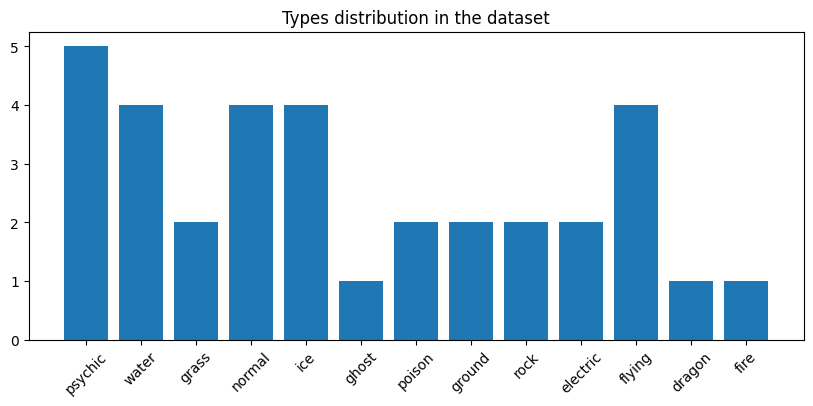

In [59]:
#Distribution of pokémon types 

from collections import Counter
import matplotlib.pyplot as plt

all_types = [t for types in types_dict.values() for t in types]
type_counts = Counter(all_types)

print("Types distribution:")
for t, c in type_counts.most_common():
    print(f"{t}: {c}")

plt.figure(figsize=(10,4))
plt.bar(type_counts.keys(), type_counts.values())
plt.title("Types distribution in the dataset")
plt.xticks(rotation=45)
plt.show()

Order of most common P1 pokémons:
tauros: 8956
chansey: 8476
snorlax: 8346
exeggutor: 7523
alakazam: 4748
starmie: 4603
zapdos: 2667
rhydon: 2618
gengar: 2493
jynx: 2387
cloyster: 1394
golem: 1214
slowbro: 1054
lapras: 1045
jolteon: 915
victreebel: 394
dragonite: 384
articuno: 360
persian: 338
charizard: 85

Order of most common P2 pokémons:
chansey: 7869
exeggutor: 7761
snorlax: 7657
alakazam: 6961
tauros: 6805
starmie: 6071
jynx: 4224
gengar: 3574
zapdos: 2161
rhydon: 2112
cloyster: 1175
jolteon: 1104
golem: 1011
lapras: 958
slowbro: 936
victreebel: 339
articuno: 292
dragonite: 292
persian: 266
charizard: 104


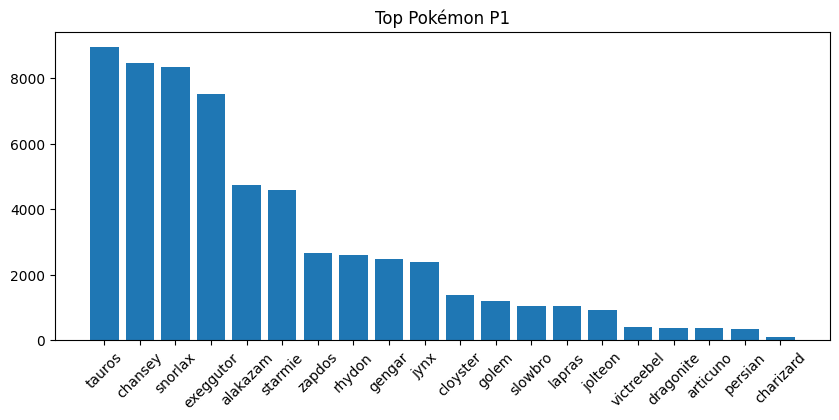

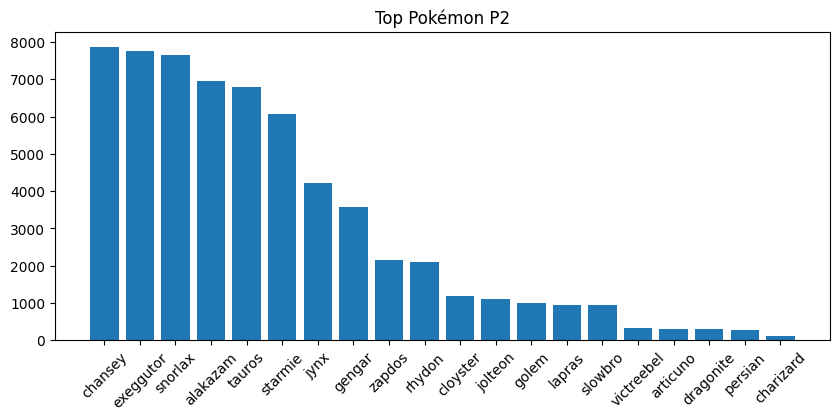

In [60]:
#Distribution of pokémon names (P1 and P2)

from collections import Counter
import matplotlib.pyplot as plt

p1_pokes = []

for battle in train_data:
    for p in battle.get("p1_team_details", []):
        name = p.get("name", "").lower()
        if name:
            p1_pokes.append(name)

p1_counts = Counter(p1_pokes)

print("Order of most common P1 pokémons:")
for name, count in p1_counts.most_common(20):
    print(f"{name}: {count}")


#P2
p2_pokes = []

for battle in train_data:
    seen_in_battle = set()
    
    #lead poke
    lead = battle.get("p2_lead_details", {})
    if lead.get("name"):
        p2_pokes.append(lead["name"].lower())

    for turn in battle.get("battle_timeline", []):
        p2_state = turn.get("p2_pokemon_state", {})
        name = p2_state.get("name", "").lower()
        if name:
            seen_in_battle.add(name)

    p2_pokes.extend(list(seen_in_battle))
            
p2_counts = Counter(p2_pokes)

print("\nOrder of most common P2 pokémons:")
for name, count in p2_counts.most_common(20):
    print(f"{name}: {count}")

def plot_counts(counter, title, top=20):
    items = counter.most_common(top)
    labels, values = zip(*items)

    plt.figure(figsize=(10,4))
    plt.bar(labels, values)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_counts(p1_counts, "Top Pokémon P1")
plot_counts(p2_counts, "Top Pokémon P2")

In [61]:
print(sorted(types_dict.keys()))

['alakazam', 'articuno', 'chansey', 'charizard', 'cloyster', 'dragonite', 'exeggutor', 'gengar', 'golem', 'jolteon', 'jynx', 'lapras', 'persian', 'rhydon', 'slowbro', 'snorlax', 'starmie', 'tauros', 'victreebel', 'zapdos']


In [62]:
#Checking for all possible statuses in the dataset

statuses = set()

for battle in train_data:
    for turn in battle.get("battle_timeline", []):
        for side in ["p1_pokemon_state", "p2_pokemon_state"]:
            st = (turn.get(side) or {}).get("status")
            if st is not None:
                statuses.add(st.lower())

print("Status found in the dataset:", statuses)

Status found in the dataset: {'frz', 'tox', 'par', 'brn', 'fnt', 'slp', 'nostatus', 'psn'}


In [63]:
#Calculating the status frequencies 

from collections import Counter

status_counter = Counter()

for battle in train_data:
    for turn in battle.get("battle_timeline", []):
        for side in ["p1_pokemon_state", "p2_pokemon_state"]:
            st = (turn.get(side) or {}).get("status")
            if st is not None:
                status_counter[st.lower()] += 1

print(status_counter)

Counter({'nostatus': 360407, 'par': 149217, 'slp': 50874, 'fnt': 27542, 'frz': 9085, 'tox': 1252, 'psn': 975, 'brn': 648})


## **Win-rate per pokemon**

In [64]:
#FEATURE: WIN-RATE PER POKEMON --> how many times each pokemon is associated with wins/tot battle in which he either wins or loses
#Done an all the train set, not folds --> prone to leakage 

from collections import defaultdict

pokemon_stats = defaultdict(lambda: {"games": 0, "wins": 0})

for battle in train_data:
    winner = battle.get("player_won", False)  

    #p1
    p1_team = battle.get("p1_team_details", [])
    for p in p1_team:
        name = p.get("name", "").lower()
        if name:
            pokemon_stats[name]["games"] += 1
            if winner:  # P1 wins
                pokemon_stats[name]["wins"] += 1

    #p2 lead and seen
    seen_p2 = set()
    lead = battle.get("p2_lead_details", {})
    if lead.get("name"):
        seen_p2.add(lead["name"].lower())
        
    for turn in battle.get("battle_timeline", []):
        n = (turn.get("p2_pokemon_state") or {}).get("name", "").lower()
        if n:
            seen_p2.add(n)

    for name in seen_p2:
        pokemon_stats[name]["games"] += 1
        if not winner:  # P2 wins
            pokemon_stats[name]["wins"] += 1

#computing win-rate 
pokemon_winrate = []
for name, stats in pokemon_stats.items():
    if stats["games"] > 0:
        winrate = stats["wins"] / stats["games"]
        pokemon_winrate.append((name, stats["games"], stats["wins"], round(winrate, 3)))



#sorting and printing top
pokemon_winrate = sorted(pokemon_winrate, key=lambda x: x[3], reverse=True)
for name, games, wins, wr in pokemon_winrate:
    print(f"{name:12s} | games: {games:4d} | wins: {wins:4d} | winrate: {wr:.3f}")


cloyster     | games: 2553 | wins: 1406 | winrate: 0.551
jynx         | games: 4679 | wins: 2508 | winrate: 0.536
articuno     | games:  644 | wins:  335 | winrate: 0.520
exeggutor    | games: 14557 | wins: 7358 | winrate: 0.505
starmie      | games: 8753 | wins: 4413 | winrate: 0.504
alakazam     | games: 9071 | wins: 4543 | winrate: 0.501
gengar       | games: 4760 | wins: 2352 | winrate: 0.494
chansey      | games: 16158 | wins: 7930 | winrate: 0.491
snorlax      | games: 15902 | wins: 7790 | winrate: 0.490
jolteon      | games: 1742 | wins:  854 | winrate: 0.490
lapras       | games: 1989 | wins:  966 | winrate: 0.486
tauros       | games: 15571 | wins: 7312 | winrate: 0.470
rhydon       | games: 4707 | wins: 2207 | winrate: 0.469
zapdos       | games: 4684 | wins: 2168 | winrate: 0.463
golem        | games: 2216 | wins: 1003 | winrate: 0.453
persian      | games:  588 | wins:  256 | winrate: 0.435
victreebel   | games:  723 | wins:  311 | winrate: 0.430
charizard    | games:  162 

## **FEATURE: lost HP in the first 30 turns**

In [65]:
import numpy as np
import pandas as pd

#Checking the pokemons name to avoid that by switching you lose the count
def hp_loss_cumulative(battle, player_prefix="p1", turns=20):
    prev_hp_by_name = {}
    loss = 0.0
    for turn in battle.get("battle_timeline", [])[:turns]:
        state = (turn.get(f"{player_prefix}_pokemon_state") or {})
        name = (state.get("name") or "").lower()
        if not name:
            continue
        hp = state.get("hp_pct", None)
        if hp is None:
            continue
        if name in prev_hp_by_name and hp < prev_hp_by_name[name]:
            loss += (prev_hp_by_name[name] - hp)
        prev_hp_by_name[name] = hp
    return float(loss)


def make_hp_loss_df(battles, turns=20, include_target=True):
    rows = []
    for b in battles:
        p1 = hp_loss_cumulative(b, "p1", turns)
        p2 = hp_loss_cumulative(b, "p2", turns)
        row = {
            "battle_id": b["battle_id"],
            f"p1_hp_loss_cum_t{turns}": p1,
            f"p2_hp_loss_cum_t{turns}": p2,
            f"hp_loss_diff_t{turns}": p1 - p2,
        }
        if include_target and "player_won" in b:
            row["player_won"] = int(b["player_won"])
        rows.append(row)
    return pd.DataFrame(rows)


#More windows (5,10,30 turns), useful for XGB
def make_hp_loss_df_multi(battles, turns_list=(5,10,30), include_target=True):
    rows = []
    for b in battles:
        row = {"battle_id": b["battle_id"]}
        for T in turns_list:
            p1 = hp_loss_cumulative(b, "p1", T)
            p2 = hp_loss_cumulative(b, "p2", T)
            row[f"p1_hp_loss_cum_t{T}"] = p1
            row[f"p2_hp_loss_cum_t{T}"] = p2
            row[f"hp_loss_diff_t{T}"] = p1 - p2
        if include_target and "player_won" in b:
            row["player_won"] = int(b["player_won"])
        rows.append(row)
    return pd.DataFrame(rows)

In [66]:
def make_hp_loss_df_multi(battles, turns_list=(5, 10, 20, 30), include_target=True):
    rows = []
    for b in battles:
        row = {"battle_id": b["battle_id"]}
        
        cum_loss = {} # Dizionario temporaneo per calcolare le differenze
        
        for T in turns_list:
            p1 = hp_loss_cumulative(b, "p1", T)
            p2 = hp_loss_cumulative(b, "p2", T)
           
            cum_loss[(T, "p1")] = p1
            cum_loss[(T, "p2")] = p2
        
            row[f"p1_hp_loss_cum_t{T}"] = p1
            row[f"p2_hp_loss_cum_t{T}"] = p2
            row[f"hp_loss_diff_t{T}"] = p1 - p2
        
        if 10 in turns_list and 20 in turns_list:
            p1_mid = cum_loss[(20, "p1")] - cum_loss[(10, "p1")]
            p2_mid = cum_loss[(20, "p2")] - cum_loss[(10, "p2")]
            
            row["p1_hp_loss_midgame"] = p1_mid
            row["p2_hp_loss_midgame"] = p2_mid
            row["hp_momentum_midgame"] = p1_mid - p2_mid 

        if 20 in turns_list and 30 in turns_list:
            p1_late = cum_loss[(30, "p1")] - cum_loss[(20, "p1")]
            p2_late = cum_loss[(30, "p2")] - cum_loss[(20, "p2")]
            
            row["p1_hp_loss_late"] = p1_late
            row["p2_hp_loss_late"] = p2_late
            row["hp_momentum_late"] = p1_late - p2_late

        if include_target and "player_won" in b:
            row["player_won"] = int(b["player_won"])
        rows.append(row)
    return pd.DataFrame(rows)

In [67]:
#Visualizing data

hp_df_multi = make_hp_loss_df_multi(train_data, turns_list=(5,10,30))

print(hp_df_multi.head())
print(hp_df_multi.describe())

   battle_id  p1_hp_loss_cum_t5  p2_hp_loss_cum_t5  hp_loss_diff_t5  \
0          0           0.778626           0.504644         0.273982   
1          1           0.600000           0.190000         0.410000   
2          2           0.000000           0.860000        -0.860000   
3          3           0.290000           0.000000         0.290000   
4          4           0.440000           0.300000         0.140000   

   p1_hp_loss_cum_t10  p2_hp_loss_cum_t10  hp_loss_diff_t10  \
0            1.289142            0.913313           0.37583   
1            0.800000            0.380000           0.42000   
2            0.000000            1.100000          -1.10000   
3            0.680000            0.210000           0.47000   
4            0.950000            1.220000          -0.27000   

   p1_hp_loss_cum_t30  p2_hp_loss_cum_t30  hp_loss_diff_t30  player_won  
0            2.513947            2.341664          0.172282           1  
1            3.070000            2.790000     

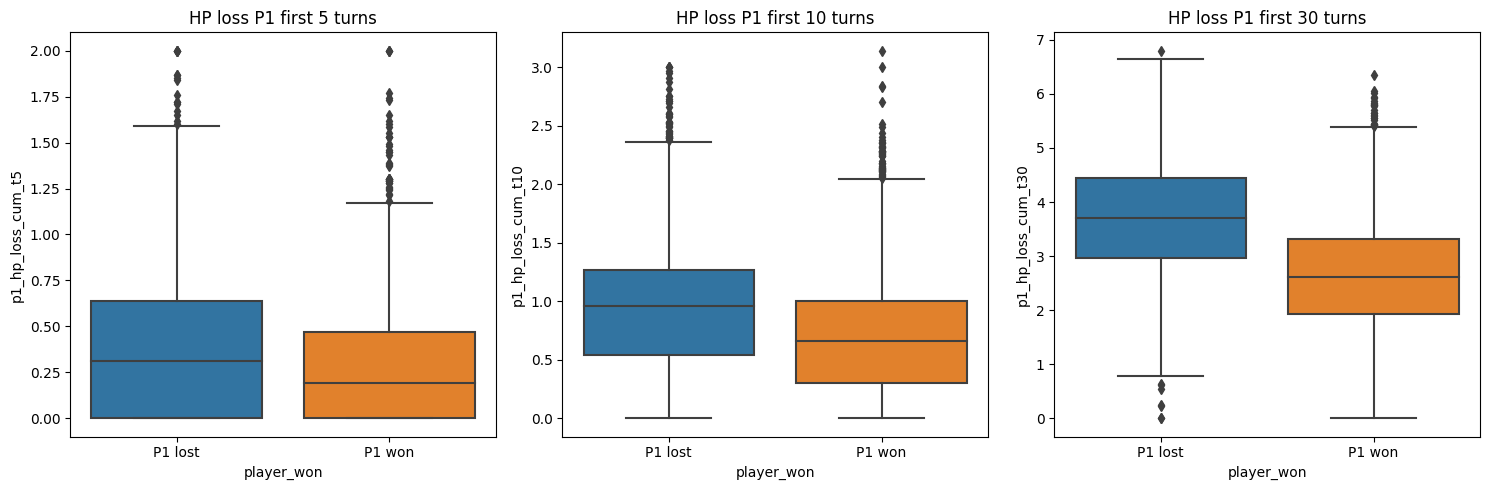

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15,5))
windows = [5,10,30]

for i,T in enumerate(windows):
    sns.boxplot(
        data=hp_df_multi,
        x="player_won",
        y=f"p1_hp_loss_cum_t{T}",
        ax=axes[i]
    )
    axes[i].set_title(f"HP loss P1 first {T} turns")
    axes[i].set_xticklabels(["P1 lost", "P1 won"])

plt.tight_layout()
plt.show()

# **FEATURE ENGINEERING**

In [69]:
winrate_by_name = {}
for name, stats in pokemon_stats.items():
    g, w = stats["games"], stats["wins"]
    winrate_by_name[name] = (w / g) if g > 0 else 0.5  

In [70]:
#Chart implementation for train

battle_effectiveness = []

for battle in train_data:
    eff = compute_real_effectiveness(battle, type_chart_df, dataset_types)
    battle_effectiveness.append({
        "battle_id": battle["battle_id"],
        "p1_super_effective": eff["p1_super"],
        "p2_super_effective": eff["p2_super"],
        "p1_half_effective": eff["p1_half"],
        "p2_half_effective": eff["p2_half"],
        "p1_null_effective": eff["p1_null"],
        "p2_null_effective": eff["p2_null"],
        "effectiveness_diff": eff["p1_super"] - eff["p2_super"],
        "player_won": battle["player_won"]
    })

effectiveness_df_train = pd.DataFrame(battle_effectiveness)


test_effectiveness = []

for battle in test_data:
    eff = compute_real_effectiveness(battle, type_chart_df, dataset_types)
    test_effectiveness.append({
        "battle_id": battle["battle_id"],
        "p1_super_effective": eff["p1_super"],
        "p2_super_effective": eff["p2_super"],
        "p1_half_effective": eff["p1_half"],
        "p2_half_effective": eff["p2_half"],
        "p1_null_effective": eff["p1_null"],
        "p2_null_effective": eff["p2_null"],
        "effectiveness_diff": eff["p1_super"] - eff["p2_super"]
    })

effectiveness_df_test = pd.DataFrame(test_effectiveness)

# **FEATURE ENGINEERING**

## **FEATURE: extract_team_stats**

In [71]:
#STATS DICTIONARY 

#from p1 and p2 lead
def build_name_to_stats(battles):
    name_to_stats = {}

    for b in battles:
        #P1
        for p in b.get("p1_team_details", []):
            n = (p.get("name") or "").lower()
            if n and n not in name_to_stats:
                name_to_stats[n] = {
                    "hp": p.get("base_hp", 0),
                    "atk": p.get("base_atk", 0),
                    "def": p.get("base_def", 0),
                    "spa": p.get("base_spa", 0),
                    "spd": p.get("base_spd", 0),
                    "spe": p.get("base_spe", 0),
                }

        #P2
        lead = b.get("p2_lead_details") or {}
        n = (lead.get("name") or "").lower()
        if n and n not in name_to_stats:
            name_to_stats[n] = {
                "hp": lead.get("base_hp", 0),
                "atk": lead.get("base_atk", 0),
                "def": lead.get("base_def", 0),
                "spa": lead.get("base_spa", 0),
                "spd": lead.get("base_spd", 0),
                "spe": lead.get("base_spe", 0),
            }

    return name_to_stats


#P2 pokemons first time they're seen (no repetitions)
def get_p2_seen_unique(battle, max_turns=30):
    seen = set()
    lead = battle.get("p2_lead_details") or {}
    if lead.get("name"):
        seen.add(lead["name"].lower())

    for turn in battle.get("battle_timeline", [])[:max_turns]:
        state = turn.get("p2_pokemon_state") or {}
        n = (state.get("name") or "").lower()
        if n:
            seen.add(n)

    return seen  

In [72]:
#MEAN STATS OVER P1 and P2
import numpy as np
import pandas as pd

def safe_mean(vals):
    return float(np.mean(vals)) if vals else 0.0

def extract_team_stats(battle, stats_map, max_turns=30):
    p1_team = battle.get("p1_team_details", []) or []
    p1_hp  = [p.get("base_hp", 0)  for p in p1_team]
    p1_atk = [p.get("base_atk", 0) for p in p1_team]
    p1_def = [p.get("base_def", 0) for p in p1_team]
    p1_spa = [p.get("base_spa", 0) for p in p1_team]
    p1_spd = [p.get("base_spd", 0) for p in p1_team]
    p1_spe = [p.get("base_spe", 0) for p in p1_team]

    p2_names = get_p2_seen_unique(battle, max_turns=max_turns)

    p2_hp, p2_atk, p2_def, p2_spa, p2_spd, p2_spe = [], [], [], [], [], []
    for n in p2_names:
        s = stats_map.get(n)
        if s:
            p2_hp.append(s["hp"])
            p2_atk.append(s["atk"])
            p2_def.append(s["def"])
            p2_spa.append(s["spa"])
            p2_spd.append(s["spd"])
            p2_spe.append(s["spe"])

    return {
        "battle_id": battle.get("battle_id"), 
        "player_won": int(battle.get("player_won", 0)),

        "p1_mean_hp":  safe_mean(p1_hp),
        "p1_mean_atk": safe_mean(p1_atk),
        "p1_mean_def": safe_mean(p1_def),
        "p1_mean_spa": safe_mean(p1_spa),
        "p1_mean_spd": safe_mean(p1_spd),
        "p1_mean_spe": safe_mean(p1_spe),

        "p2_mean_hp":  safe_mean(p2_hp),
        "p2_mean_atk": safe_mean(p2_atk),
        "p2_mean_def": safe_mean(p2_def),
        "p2_mean_spa": safe_mean(p2_spa),
        "p2_mean_spd": safe_mean(p2_spd),
        "p2_mean_spe": safe_mean(p2_spe),

        "p2_seen_count": len(p2_names), 
    }

In [73]:
#Dataframe

'''
stats_map = build_name_to_stats(train_data)
rows = [extract_team_stats(battle, stats_map) for battle in train_data]
train_stats_df = pd.DataFrame(rows)
train_stats_df.head()
'''

'\nstats_map = build_name_to_stats(train_data)\nrows = [extract_team_stats(battle, stats_map) for battle in train_data]\ntrain_stats_df = pd.DataFrame(rows)\ntrain_stats_df.head()\n'

In [74]:
def make_team_stats_df(battles, stats_map, max_turns=30):
    rows = []
    for b in battles:
        rows.append(extract_team_stats(b, stats_map=stats_map, max_turns=max_turns))
    return pd.DataFrame(rows)

## **Chart implementation**

In [75]:
from io import StringIO

csv_data = """Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1,1,1,1,1,1,1,1,1,1,1,0.5,0,1,1,0.5,1
Fire,1,0.5,0.5,1,2,2,1,1,1,1,1,2,0.5,1,0.5,1,2,1
Water,1,2,0.5,1,0.5,1,1,1,2,1,1,1,2,1,0.5,1,1,1
Electric,1,1,2,0.5,0.5,1,1,1,0,2,1,1,1,1,0.5,1,1,1
Grass,1,0.5,2,1,0.5,1,1,0.5,2,0.5,1,0.5,2,1,0.5,1,0.5,1
Ice,1,0.5,0.5,1,2,0.5,1,1,2,2,1,1,1,1,2,1,0.5,1
Fighting,2,1,1,1,1,2,1,0.5,1,0.5,0.5,0.5,2,0,1,2,2,0.5
Poison,1,1,1,1,2,1,1,0.5,0.5,1,1,1,0.5,0.5,1,1,0,2
Ground,1,2,1,2,0.5,1,1,2,1,0,1,0.5,2,1,1,1,2,1
Flying,1,1,1,0.5,2,1,2,1,1,1,1,2,0.5,1,1,1,0.5,1
Psychic,1,1,1,1,1,1,2,2,1,1,0.5,1,1,1,1,0,0.5,1
Bug,1,0.5,1,1,2,1,0.5,0.5,1,0.5,2,1,1,0.5,1,2,0.5,0.5
Rock,1,2,1,1,1,2,0.5,1,0.5,2,1,2,1,1,1,1,0.5,1
Ghost,0,1,1,1,1,1,1,1,1,1,2,1,1,2,1,0.5,1,1
Dragon,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0.5,0
Dark,1,1,1,1,1,1,0.5,1,1,1,2,1,1,2,1,0.5,1,0.5
Steel,1,0.5,0.5,0.5,1,2,1,1,1,1,1,1,2,1,1,1,0.5,2
Fairy,1,0.5,1,1,1,1,2,0.5,1,1,1,1,1,1,2,2,0.5,1
"""

type_chart_df = pd.read_csv(StringIO(csv_data))
display(type_chart_df)

#l'idea è: in una battaglia il numero di mosse efficaci è determinante
#per ogni battaglia, per ogni mossa del team 1 e per ogni mossa del team 2 devo controllare nella type_chart l'effectiveness. 
#Poi stampo effectiveness dei due team


########################Codice ripreso#####################################
from collections import defaultdict

dataset_types = defaultdict(set)

for battle in train_data:
    #P1 pokémons, 6
    for p in battle.get("p1_team_details", []):
        name = p.get("name", "").lower()
        for t in p.get("types", []):
            if t != "notype" and t:
                dataset_types[name].add(t.lower())

    #P2 lead pokémon
    lead = battle.get("p2_lead_details", {})
    name = lead.get("name", "").lower()
    for t in lead.get("types", []):
        if t != "notype" and t:
            dataset_types[name].add(t.lower())
            
    #P2 pokémons appeared in the battle_timeline
    for turn in battle.get("battle_timeline", []):
        p2_state = turn.get("p2_pokemon_state", {})
        name = p2_state.get("name", "").lower()
        if name:
            pass #no types rn

types_dict = {name: sorted(list(types)) for name, types in dataset_types.items()}

print("All pokèmon names and relative types:\n")
for name, types in sorted(types_dict.items()):
    print(f"{name}: {types}")

all_types = sorted({t for types in types_dict.values() for t in types})

print(f"\nTot number of found pokémon types: {len(all_types)}")
print("Types:", ", ".join(all_types))


############################################################################

def compute_real_effectiveness(battle, type_chart_df, dataset_types):
    p1_super = 0
    p2_super = 0
    p1_null = 0
    p2_null = 0
    p1_half = 0
    p2_half = 0

    for turn in battle.get("battle_timeline", []):
        p1_move = turn.get("p1_move_details")
        if p1_move:
            move_type = p1_move.get("type", "").capitalize()
            defender_name = turn.get("p2_pokemon_state", {}).get("name", "").lower()
            defender_types = dataset_types.get(defender_name, [])
            
            for def_type in defender_types:
                def_type = def_type.capitalize()
                if move_type in type_chart_df.index and def_type in type_chart_df.columns:
                    eff = type_chart_df.loc[move_type, def_type]
                    if eff == 2.0:
                        p1_super += 1
                    if eff == 0:
                        p1_null += 1
                    if eff == 0.5:
                        p1_half += 1

        p2_move = turn.get("p2_move_details")
        if p2_move:
            move_type = p2_move.get("type", "").capitalize()
            defender_name = turn.get("p1_pokemon_state", {}).get("name", "").lower()
            defender_types = dataset_types.get(defender_name, [])
            
            for def_type in defender_types:
                def_type = def_type.capitalize()
                if move_type in type_chart_df.index and def_type in type_chart_df.columns:
                    eff = type_chart_df.loc[move_type, def_type]
                    if eff == 2.0:
                        p2_super += 1
                    if eff == 0:
                        p2_null += 1
                    if eff == 0.5:
                        p2_half += 1
    return {
        "p1_super": p1_super,
        "p2_super": p2_super,
        "p1_half": p1_half,
        "p2_half": p2_half,
        "p1_null": p1_null,
        "p2_null": p2_null
}


battle_effectiveness = []

for battle in train_data:
    eff = compute_real_effectiveness(battle, type_chart_df, dataset_types)
    
    battle_effectiveness.append({
        "battle_id": battle["battle_id"],
        "p1_super_effective": eff["p1_super"],
        "p2_super_effective": eff["p2_super"],
        "p1_half_effective": eff["p1_half"],
        "p2_half_effective": eff["p2_half"],
        "p1_null_effective": eff["p1_null"],
        "p2_null_effective": eff["p2_null"],
        "effectiveness_diff": eff["p1_super"] - eff["p2_super"],
        "player_won": battle["player_won"]
    })

effectiveness_df = pd.DataFrame(battle_effectiveness)
display(effectiveness_df.head())
#If p1 wins, the number of effective moves is higher

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


All pokèmon names and relative types:

alakazam: ['psychic']
articuno: ['flying', 'ice']
chansey: ['normal']
charizard: ['fire', 'flying']
cloyster: ['ice', 'water']
dragonite: ['dragon', 'flying']
exeggutor: ['grass', 'psychic']
gengar: ['ghost', 'poison']
golem: ['ground', 'rock']
jolteon: ['electric']
jynx: ['ice', 'psychic']
lapras: ['ice', 'water']
persian: ['normal']
rhydon: ['ground', 'rock']
slowbro: ['psychic', 'water']
snorlax: ['normal']
starmie: ['psychic', 'water']
tauros: ['normal']
victreebel: ['grass', 'poison']
zapdos: ['electric', 'flying']

Tot number of found pokémon types: 13
Types: dragon, electric, fire, flying, ghost, grass, ground, ice, normal, poison, psychic, rock, water


,battle_id,p1_super_effective,p2_super_effective,p1_half_effective,p2_half_effective,p1_null_effective,p2_null_effective,effectiveness_diff,player_won
0,0,7,1,11,1,0,0,6,True
1,1,2,4,5,6,0,0,-2,True
2,2,9,2,2,1,1,0,7,True
3,3,4,2,2,0,0,0,2,True
4,4,3,0,10,0,0,0,3,True


## **FEATURE: types matchup**

In [76]:
def mean_type_effectiveness(attacking_types, defending_types, type_chart_df):
    vals = []
    for atk in attacking_types:
        atk_cap = atk.capitalize()
        if atk_cap not in type_chart_df.index:
            continue
        for df in defending_types:
            df_cap = df.capitalize()
            if df_cap not in type_chart_df.columns:
                continue
            eff = type_chart_df.loc[atk_cap, df_cap]
            vals.append(float(eff))
    if not vals:
        return 1.0  # neutro se non abbiamo info
    return float(np.mean(vals))


def get_p1_lead_name(battle):
    timeline = battle.get("battle_timeline") or []
    if not timeline:
        return None
    first_state = timeline[0].get("p1_pokemon_state") or {}
    n = (first_state.get("name") or "").lower()
    return n or None

def get_p2_lead_name(battle):
    lead = battle.get("p2_lead_details") or {}
    n = (lead.get("name") or "").lower()
    return n or None

def lead_type_matchup_one_battle(battle, type_chart_df, types_dict):
    p1_name = get_p1_lead_name(battle)
    p2_name = get_p2_lead_name(battle)

    p1_types = types_dict.get(p1_name, [])
    p2_types = types_dict.get(p2_name, [])

    if not p1_types or not p2_types:
        adv_p1 = 1.0
        adv_p2 = 1.0
    else:
        adv_p1 = mean_type_effectiveness(p1_types, p2_types, type_chart_df)
        adv_p2 = mean_type_effectiveness(p2_types, p1_types, type_chart_df)

    return {
        "battle_id": battle.get("battle_id"),
        "lead_type_adv_p1": adv_p1,
        "lead_type_adv_p2": adv_p2,
        "lead_type_adv_diff": adv_p1 - adv_p2,
        "player_won": int(battle.get("player_won", 0)) if "player_won" in battle else 0,
    }

def make_lead_type_matchup_df(battles, type_chart_df, types_dict, include_target=True):
    rows = []
    for b in battles:
        row = lead_type_matchup_one_battle(b, type_chart_df, types_dict)
        if not include_target and "player_won" in row:
            row.pop("player_won", None)
        rows.append(row)
    return pd.DataFrame(rows)

## **FEATURE: build_wr_map_from_battles (fold-safe winrate)**

In [77]:
from collections import defaultdict
import pandas as pd
import numpy as np

#Win-rate calculated with SMOOTHING to avoid leakage in the fold 

def build_wr_map_from_battles(battles, M=100):
    stats = defaultdict(lambda: {"games": 0, "wins": 0}) #initializing a dict "stats" to count wins and loss for each pokemon 
    
    global_wins = 0
    global_games = 0

    for b in battles:
        winner = bool(b.get("player_won", False))
        global_games += 1
        if winner:
            global_wins += 1

        #Adding results from P1 6 pokemons and P2 lead+timeline pokemons 
        #P1 team
        for p in (b.get("p1_team_details") or []):
            n = (p.get("name") or "").lower()
            if not n: 
                continue
            stats[n]["games"] += 1
            if winner:
                stats[n]["wins"] += 1

        #P2 lead + visti nella timeline
        seen_p2 = set()
        lead = b.get("p2_lead_details") or {}
        if lead.get("name"):
            seen_p2.add((lead["name"] or "").lower())
        for turn in (b.get("battle_timeline") or []):
            n = (turn.get("p2_pokemon_state") or {}).get("name", "")
            if n:
                seen_p2.add(n.lower())

        for n in seen_p2:
            stats[n]["games"] += 1
            if not winner:
                stats[n]["wins"] += 1

    #Global mean calculation
    global_mean_wr = (global_wins / global_games) if global_games > 0 else 0.5

    wr_map = {}
    for n, s in stats.items():
        g, w = s["games"], s["wins"]
        #Smoothing formula --> weighted mean 
        #Lo smoothing è importante soprattutto quando si lavora nei folds perchè lì i pokemon rari diventano ancora più rari. 
        wr_map[n] = (w + M * global_mean_wr) / (g + M)
    
    wr_map_with_default = defaultdict(lambda: global_mean_wr)
    wr_map_with_default.update(wr_map)
    
    return wr_map_with_default

In [78]:
def make_team_wr_df(battles, wr_map, max_turns=30):
    rows = []
    for b in battles:
        row = {
            "battle_id": b.get("battle_id"),
            "player_won": int(b.get("player_won", 0)),
        }

        p1_team = b.get("p1_team_details") or []
        p1_wrs = []
        for p in p1_team:
            n = (p.get("name") or "").lower()
            if n:
                p1_wrs.append(wr_map[n])

        if p1_wrs:
            row["p1_team_wr_avg"] = float(np.mean(p1_wrs))
            row["p1_team_wr_max"] = float(np.max(p1_wrs))
            row["p1_team_wr_min"] = float(np.min(p1_wrs))
        else:
            example_wr = next(iter(wr_map.values()))
            row["p1_team_wr_avg"] = example_wr
            row["p1_team_wr_max"] = example_wr
            row["p1_team_wr_min"] = example_wr

        lead = b.get("p2_lead_details") or {}
        if lead.get("name"):
            n2 = (lead["name"] or "").lower()
            row["p2_lead_wr"] = wr_map[n2]
        else:
            row["p2_lead_wr"] = next(iter(wr_map.values()))

        row["diff_wr_avg"] = row["p1_team_wr_avg"] - row["p2_lead_wr"]
        rows.append(row)

    return pd.DataFrame(rows)

## **FEATURE: switches_for_player**

In [79]:
def switches_for_player(battle, player_prefix="p2", max_turns=30):
    timeline = (battle.get("battle_timeline") or [])[:max_turns]
    if not timeline:
        return 0

    if player_prefix == "p2":
        lead = (battle.get("p2_lead_details") or {}).get("name")
    else:
        first_state = (timeline[0].get(f"{player_prefix}_pokemon_state") or {})
        lead = first_state.get("name")

    last = lead
    switches = 0

    for turn in timeline:
        curr = (turn.get(f"{player_prefix}_pokemon_state") or {}).get("name")
        if curr is not None and last is not None and curr != last:
            switches += 1
        if curr is not None:
            last = curr

    return switches

In [80]:
def make_switch_df(battles, max_turns=30):
    rows = []
    for b in battles:
        row = {
            "battle_id": b.get("battle_id"),
            "player_won": int(b.get("player_won", 0)),
            f"p1_switches_{max_turns}": switches_for_player(b, player_prefix="p1", max_turns=max_turns),
            f"p2_switches_{max_turns}": switches_for_player(b, player_prefix="p2", max_turns=max_turns),
        }
        rows.append(row)
    return pd.DataFrame(rows)

## **FEATURE: p1_seen_count and p2_seen_count**

In [81]:
def get_seen_unique(battle, player_prefix, max_turns=30):
    seen = set()
    
    #Checking the lead
    if player_prefix == "p2":
        lead = (battle.get("p2_lead_details") or {}).get("name")
    else:
        timeline = battle.get("battle_timeline", [])
        first_state = (timeline[0].get(f"{player_prefix}_pokemon_state") or {}) if timeline else {}
        lead = first_state.get("name")
    if lead:
        seen.add(lead.lower())

    #Analysing the timeline
    for turn in battle.get("battle_timeline", [])[:max_turns]:
        state = turn.get(f"{player_prefix}_pokemon_state") or {}
        n = (state.get("name") or "").lower()
        if n:
            seen.add(n)
    return seen

def make_seen_p1p2_df(battles, turns_list=(10,20,30), include_target=True):
    rows = []
    for b in battles:
        row = {"battle_id": b.get("battle_id")}
        if include_target:
            row["player_won"] = int(b.get("player_won", 0))

        for T in turns_list:
            p1_seen = get_seen_unique(b, player_prefix="p1", max_turns=T)
            p2_seen = get_seen_unique(b, player_prefix="p2", max_turns=T)

            row[f"p1_seen_count_{T}"] = len(p1_seen)
            row[f"p2_seen_count_{T}"] = len(p2_seen)

        rows.append(row)

    return pd.DataFrame(rows)

## **FEATURE: make_hp_loss_df**

In [82]:
def make_hp_loss_df(battles, turns=30):
  
    rows = []
    for b in battles:
        timeline = (b.get("battle_timeline") or [])[:turns]

        p1_hp_list = []
        p2_hp_list = []

        for t in timeline:
            p1_state = t.get("p1_pokemon_state") or {}
            p2_state = t.get("p2_pokemon_state") or {}
            if p1_state.get("hp_pct") is not None:
                p1_hp_list.append(p1_state["hp_pct"])
            if p2_state.get("hp_pct") is not None:
                p2_hp_list.append(p2_state["hp_pct"])

        if timeline:
            last = timeline[-1]
            p1_last = (last.get("p1_pokemon_state") or {}).get("hp_pct", 1.0)
            p2_last = (last.get("p2_pokemon_state") or {}).get("hp_pct", 1.0)
        else:
            p1_last = 1.0
            p2_last = 1.0

        row = {
            "battle_id": b.get("battle_id"),
            "player_won": int(b.get("player_won", 0)),
            f"p1_hp_mean_{turns}": float(np.mean(p1_hp_list)) if p1_hp_list else 1.0,
            f"p2_hp_mean_{turns}": float(np.mean(p2_hp_list)) if p2_hp_list else 1.0,
            f"p1_hp_last_{turns}": p1_last,
            f"p2_hp_last_{turns}": p2_last,
        }
        rows.append(row)

    return pd.DataFrame(rows)


## **FEATURE: make_hp_loss_df_multi**

In [83]:
def make_hp_loss_df_multi(battles, turns_list=(10,20,30), include_target=True):
 
    rows = []

    for b in battles:
        row = {
            "battle_id": b.get("battle_id"),
        }
        if include_target:
            row["player_won"] = int(b.get("player_won", 0))

        for T in turns_list:
            timeline = (b.get("battle_timeline") or [])[:T]

            p1_hp_list = []
            p2_hp_list = []

            for t in timeline:
                p1_state = t.get("p1_pokemon_state") or {}
                p2_state = t.get("p2_pokemon_state") or {}
                if p1_state.get("hp_pct") is not None:
                    p1_hp_list.append(p1_state["hp_pct"])
                if p2_state.get("hp_pct") is not None:
                    p2_hp_list.append(p2_state["hp_pct"])

            if timeline:
                last = timeline[-1]
                p1_last = (last.get("p1_pokemon_state") or {}).get("hp_pct", 1.0)
                p2_last = (last.get("p2_pokemon_state") or {}).get("hp_pct", 1.0)
            else:
                p1_last = 1.0
                p2_last = 1.0

            row[f"p1_hp_mean_{T}"] = float(np.mean(p1_hp_list)) if p1_hp_list else 1.0
            row[f"p2_hp_mean_{T}"] = float(np.mean(p2_hp_list)) if p2_hp_list else 1.0
            row[f"p1_hp_last_{T}"] = p1_last
            row[f"p2_hp_last_{T}"] = p2_last

        rows.append(row)

    return pd.DataFrame(rows)

## **FEATURE: make_momentum_df**

In [84]:
def compute_momentum_features(battle, max_turns=30):
    
    timeline = (battle.get("battle_timeline") or [])[:max_turns]

    p1 = []
    p2 = []

    for t in timeline:
        s1 = (t.get("p1_pokemon_state") or {})
        s2 = (t.get("p2_pokemon_state") or {})

        hp1 = s1.get("hp_pct", 1.0)
        hp2 = s2.get("hp_pct", 1.0)

        p1.append(hp1)
        p2.append(hp2)

    if not p1:
        return {
            "momentum_final": 0.0,
            "momentum_max":   0.0,
            "momentum_min":   0.0,
            "momentum_auc":   0.0,
            "slope_1_5":      0.0,
            "slope_5_10":     0.0,
            "slope_10_20":    0.0,
        }

    momentum = [p2[i] - p1[i] for i in range(len(p1))]

    final_m = momentum[-1]
    max_m   = max(momentum)
    min_m   = min(momentum)

    auc = float(np.trapz(momentum))

    def safe_slope(arr, start, end):
        if len(arr) <= start or len(arr) <= end:
            return 0.0
        return arr[end] - arr[start]

    slope_1_5   = safe_slope(momentum, 0, min(4, len(momentum)-1))
    slope_5_10  = safe_slope(momentum, min(4,len(momentum)-1), min(9,len(momentum)-1))
    slope_10_20 = safe_slope(momentum, min(9,len(momentum)-1), min(19,len(momentum)-1))

    return {
        "momentum_final": final_m,
        "momentum_max": max_m,
        "momentum_min": min_m,
        "momentum_auc": auc,
        "slope_1_5": slope_1_5,
        "slope_5_10": slope_5_10,
        "slope_10_20": slope_10_20,
    }

def make_momentum_df(battles, max_turns=30):
    rows = []
    for b in battles:
        r = {"battle_id": b.get("battle_id")}
        r.update(compute_momentum_features(b, max_turns))
        if "player_won" in b:
            r["player_won"] = int(b["player_won"])
        rows.append(r)
    return pd.DataFrame(rows)

## **FEATURE: status**

In [85]:
VALID_STATI = ["par", "slp", "frz", "tox", "psn", "brn"]  

def _one_side_status_counts(battle, attacker_prefix="p1", defender_prefix="p2", turns=30):
    counts = {f"{attacker_prefix}_caused_{s}_t{turns}": 0 for s in VALID_STATI}
    for turn in battle.get("battle_timeline", [])[:turns]:
        dstate = (turn.get(f"{defender_prefix}_pokemon_state") or {})
        s = (dstate.get("status") or "").lower()
        if s in VALID_STATI:
            counts[f"{attacker_prefix}_caused_{s}_t{turns}"] += 1
    return counts

def status_counts_one_battle(battle, turns=30):
    row = {"battle_id": battle["battle_id"]}
    
    row.update(_one_side_status_counts(battle, "p1", "p2", turns))
    row.update(_one_side_status_counts(battle, "p2", "p1", turns))

    for s in VALID_STATI:
        row[f"{s}_diff_t{turns}"] = (
            row[f"p1_caused_{s}_t{turns}"] - row[f"p2_caused_{s}_t{turns}"]
        )
    
    for s in VALID_STATI:
        row[f"{s}_rate_t{turns}"] = (
            row[f"p1_caused_{s}_t{turns}"] + row[f"p2_caused_{s}_t{turns}"]
        ) / float(turns)
    
    if "player_won" in battle:
        row["player_won"] = int(battle["player_won"])
    
    return row

def make_status_df(battles, turns_list=(5, 10, 20)):
    rows = []
    for b in battles:
        r = {"battle_id": b["battle_id"]}
        for t in turns_list:
            r.update(status_counts_one_battle(b, t))
        if "player_won" in b:
            r["player_won"] = int(b["player_won"])
        rows.append(r)
    return pd.DataFrame(rows).fillna(0.0)

## **FEATURE: make_bad_status_turns_df**

In [86]:
BAD_STATUS = {"slp","frz","par"}

def stage_mult(stage: int) -> float:
    if stage >= 0:
        return (2 + stage) / 2.0
    else:
        return 2.0 / (2 - stage)

def effective_speed(name: str, boosts: dict, status: str, stats_map: dict) -> float:
    if not name:
        return 0.0
    base = (stats_map.get(name.lower(), {}) or {}).get("spe", 0)
    b = boosts or {}
    stage = int(b.get("spe", 0))
    eff = base * stage_mult(stage)
    if (status or "").lower() == "par":
        eff *= 0.25
    return float(eff)

In [87]:
def make_bad_status_turns_df(battles, turns=30):
    rows = []
    for b in battles:
        p1_bad = 0
        p2_bad = 0
        for turn in b.get("battle_timeline", [])[:turns]:
            s1 = (turn.get("p1_pokemon_state") or {})
            s2 = (turn.get("p2_pokemon_state") or {})
            if (s1.get("status") or "").lower() in BAD_STATUS:
                p1_bad += 1
            if (s2.get("status") or "").lower() in BAD_STATUS:
                p2_bad += 1
        rows.append({
            "battle_id": b["battle_id"],
            "player_won": int(b.get("player_won", 0)),
            f"p1_badstatus_turns_t{turns}": p1_bad,
            f"p2_badstatus_turns_t{turns}": p2_bad,
            f"badstatus_diff_t{turns}": p1_bad - p2_bad,
        })
    return pd.DataFrame(rows)

## **FEATURE: speed advantage (good)**

In [88]:
import numpy as np
import pandas as pd

BAD_STATUS = {"slp","frz","par"}

def stage_mult(stage: int) -> float:
    if stage >= 0:
        return (2 + stage) / 2.0
    else:
        return 2.0 / (2 - stage)

def effective_speed(name: str, boosts: dict, status: str, stats_map: dict) -> float:
    if not name:
        return 0.0
    base = (stats_map.get(name.lower(), {}) or {}).get("spe", 0)
    b = boosts or {}
    stage = int(b.get("spe", 0))
    eff = base * stage_mult(stage)
    if (status or "").lower() == "par":
        eff *= 0.25
    return float(eff)



def speed_advantage_features(battle, stats_map, turns=30):
    #Number of turns where p1 is faster than p2
    faster_p1 = 0
    faster_p2 = 0
    observed = 0
    for turn in battle.get("battle_timeline", [])[:turns]:
        s1 = (turn.get("p1_pokemon_state") or {})
        s2 = (turn.get("p2_pokemon_state") or {})
        n1 = (s1.get("name") or "").lower()
        n2 = (s2.get("name") or "").lower()
        if not n1 or not n2:
            continue
        v1 = effective_speed(n1, s1.get("boosts", {}), s1.get("status"), stats_map)
        v2 = effective_speed(n2, s2.get("boosts", {}), s2.get("status"), stats_map)
        if v1 == 0 and v2 == 0:
            continue
        observed += 1
        if v1 > v2:
            faster_p1 += 1
        elif v2 > v1:
            faster_p2 += 1
    rate_p1 = faster_p1 / observed if observed else 0.0
    rate_p2 = faster_p2 / observed if observed else 0.0
    return {
        f"speed_adv_p1_t{turns}": rate_p1,
        f"speed_adv_p2_t{turns}": rate_p2,
        f"speed_adv_diff_t{turns}": rate_p1 - rate_p2
    }

def make_speed_df(battles, stats_map, turns_list=(5,10,20,30)):
    rows = []
    for b in battles:
        row = {"battle_id": b["battle_id"]}
        for T in turns_list:
            row.update(speed_advantage_features(b, stats_map, T))
        if "player_won" in b:
            row["player_won"] = int(b["player_won"])
        rows.append(row)
    return pd.DataFrame(rows)

## **FEATURE: ko_counts_one_battle**

In [89]:
def ko_counts_one_battle(battle, turns=30):
    p1_kos = p2_kos = 0
    prev1 = prev2 = None
    for turn in battle.get("battle_timeline", [])[:turns]:
        s1 = (turn.get("p1_pokemon_state") or {})
        s2 = (turn.get("p2_pokemon_state") or {})
        st1 = (s1.get("status") or "").lower()
        st2 = (s2.get("status") or "").lower()

        if st2 == "fnt" and (prev2 is None or prev2 != "fnt"):
            p1_kos += 1
        if st1 == "fnt" and (prev1 is None or prev1 != "fnt"):
            p2_kos += 1
        prev1, prev2 = st1, st2

    return {
        f"ko_for_p1_t{turns}": p1_kos,
        f"ko_for_p2_t{turns}": p2_kos,
        f"ko_diff_t{turns}": p1_kos - p2_kos
    }

def make_ko_df(battles, turns_list=(10,20,30)):
    rows = []
    for b in battles:
        row = {"battle_id": b["battle_id"]}
        for t in turns_list:
            row.update(ko_counts_one_battle(b, t))
        if "player_won" in b:
            row["player_won"] = int(b["player_won"])
        rows.append(row)
    return pd.DataFrame(rows)

## **FEATURE: first_ko_flag_one_battle**

In [90]:
def first_ko_flag_one_battle(battle, turns=30):
    prev1 = prev2 = None
    first_flag = 0

    for turn in battle.get("battle_timeline", [])[:turns]:
        s1 = (turn.get("p1_pokemon_state") or {})
        s2 = (turn.get("p2_pokemon_state") or {})

        st1 = (s1.get("status") or "").lower()
        st2 = (s2.get("status") or "").lower()

        if st2 == "fnt" and (prev2 is None or prev2 != "fnt") and first_flag == 0:
            first_flag = 1

        if st1 == "fnt" and (prev1 is None or prev1 != "fnt") and first_flag == 0:
            first_flag = -1

        prev1, prev2 = st1, st2

        if first_flag != 0:
            break

    return first_flag


def make_first_ko_df(battles, turns=30):
    rows = []
    for b in battles:
        row = {
            "battle_id": b["battle_id"],
            f"lead_ko_flag_t{turns}": first_ko_flag_one_battle(b, turns=turns)
        }
        if "player_won" in b:
            row["player_won"] = int(b["player_won"])
        rows.append(row)
    return pd.DataFrame(rows)

## **FEATURE: simple_status_events_one_battle**

In [91]:
VALID_STATI = {"par","slp","frz","tox","psn","brn"}  

def simple_status_events_one_battle(battle, max_turns=30):
    timeline = (battle.get("battle_timeline") or [])[:max_turns]

    p1_events = 0
    p2_events = 0

    prev1 = None
    prev2 = None

    for turn in timeline:
        s1 = (turn.get("p1_pokemon_state") or {}).get("status", "").lower()
        s2 = (turn.get("p2_pokemon_state") or {}).get("status", "").lower()

        if s1 in VALID_STATI and s1 != prev1:
            p1_events += 1

        if s2 in VALID_STATI and s2 != prev2:
            p2_events += 1

        prev1, prev2 = s1, s2

    return {
        f"p1_status_events_t{max_turns}": p1_events,
        f"p2_status_events_t{max_turns}": p2_events,
        f"status_events_diff_t{max_turns}": p1_events - p2_events,
    }

def make_simple_status_events_df(battles, max_turns=30):
    rows = []
    for b in battles:
        row = {"battle_id": b["battle_id"]}
        row.update(simple_status_events_one_battle(b, max_turns=max_turns))
        if "player_won" in b:
            row["player_won"] = int(b.get("player_won", 0))
        rows.append(row)
    return pd.DataFrame(rows).fillna(0.0)

# **TRAINING, CV AND HYPERPARAMETER TUNING**

In [ ]:
import numpy as np
import pandas as pd

def assemble_features_from_battles(battles, wr_map, *, include_target=True, wr_turns=30):
    stats_map_local = build_name_to_stats(battles)

    TURN_LIST_MULTI = (10, 20, 30)

    stats_df        = make_team_stats_df(battles, stats_map_local, max_turns=wr_turns)
    wr_df           = make_team_wr_df(battles, wr_map, max_turns=wr_turns)
    switch_df       = make_switch_df(battles)
    seen_df         = make_seen_p1p2_df(battles, turns_list=TURN_LIST_MULTI, include_target=include_target)
    hp_multi_df     = make_hp_loss_df_multi(battles, turns_list=TURN_LIST_MULTI, include_target=include_target)
    hp_t30_df       = make_hp_loss_df(battles, turns=30)
    status_df       = make_status_df(battles, turns_list=(5, 10, 20))
    speed_df        = make_speed_df(battles, stats_map_local, turns_list=(5,10,20,30))
    badstat_df      = make_bad_status_turns_df(battles, turns=30)  
    ko_df           = make_ko_df(battles, turns_list=(10,20,30))  
    first_ko_df     = make_first_ko_df(battles, turns=30)
    momentum_df     = make_momentum_df(battles, max_turns=wr_turns)
    status_simple_df = make_simple_status_events_df(battles, max_turns=30)

    base_cols = ["battle_id"] + (["player_won"] if include_target else [])
    out = stats_df[base_cols].copy()

    def _merge(base, more):
        if more is None:
            return base
        m = more.copy()

        if "player_won" in m.columns:
            m = m.drop(columns=["player_won"])

        drop_obj = [
            c for c in m.columns
            if c not in ("battle_id", "player_won")
            and not pd.api.types.is_numeric_dtype(m[c])
        ]
        if drop_obj:
            m = m.drop(columns=drop_obj)

        return base.merge(m, on="battle_id", how="left")

    for df in [
        stats_df,
        wr_df,
        switch_df,
        seen_df,
        hp_multi_df,
        hp_t30_df,
        status_df,
        speed_df, 
        badstat_df,
        ko_df,
        first_ko_df,
        momentum_df,
        status_simple_df
    ]:
        out = _merge(out, df)

    for c in out.columns:
        if c not in ("battle_id", "player_won"):
            out[c] = pd.to_numeric(out[c], errors="coerce")

    out = out.replace([np.inf, -np.inf], np.nan).fillna(0.0)

    return out

## **Cross-validation fold-safe (cv_fold_safe_wr) per logreg e XGB**

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

def cv_fold_safe_wr(
    train_data,
    n_splits=5,
    seed=42,
    model_kind="logreg",
    xgb_params=None,
    use_early_stopping=False,
    early_stopping_rounds=50
):
    idx = np.arange(len(train_data))
    y   = np.array([int(b.get("player_won", 0)) for b in train_data])
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

    accs, aucs, f1s, pres, recs = [], [], [], [], []

    print(f"Inizio CV {n_splits}-fold per {model_kind.upper()}...")

    for fold, (tr, va) in enumerate(skf.split(idx, y), start=1):
        tr_battles = [train_data[i] for i in tr]
        va_battles = [train_data[i] for i in va]

        wr_map_fold = build_wr_map_from_battles(tr_battles)

        df_tr = assemble_features_from_battles(
            tr_battles,
            wr_map_fold,
            include_target=True
        )
        df_va = assemble_features_from_battles(
            va_battles,
            wr_map_fold,
            include_target=True
        )

        feat_cols = [c for c in df_tr.columns if c not in ("battle_id","player_won")]

        missing_in_va = set(feat_cols) - set(df_va.columns)
        for c in missing_in_va:
            df_va[c] = 0.0

        X_tr = df_tr[feat_cols].values
        y_tr = df_tr["player_won"].astype(int).values

        X_va = df_va[feat_cols].values
        y_va = df_va["player_won"].astype(int).values

        if model_kind == "logreg":
            model = Pipeline([
                ("scaler", StandardScaler()),
                ("clf", LogisticRegression(max_iter=20000, random_state=seed))
            ])
            model.fit(X_tr, y_tr)

        else:
            base_params = dict(
                n_estimators=1200,
                learning_rate=0.05,
                max_depth=6,
                subsample=0.85,
                colsample_bytree=0.85,
                min_child_weight=2,
                gamma=0.0,
                reg_lambda=1.0,
                reg_alpha=0.0,
                eval_metric="logloss",
                tree_method="hist",
                device="cuda",
                random_state=seed,
            )
            if xgb_params is not None:
                base_params.update(xgb_params)

            base_params["random_state"] = seed

            model = XGBClassifier(**base_params)

            if use_early_stopping:
                model.fit(
                    X_tr,
                    y_tr,
                    eval_set=[(X_va, y_va)],
                    early_stopping_rounds=early_stopping_rounds,
                    verbose=False,
                )
            else:
                model.fit(X_tr, y_tr)

        pred  = model.predict(X_va)
        proba = model.predict_proba(X_va)[:,1] if hasattr(model, "predict_proba") else None

        accs.append(accuracy_score(y_va, pred))
        f1s.append(f1_score(y_va, pred))
        pres.append(precision_score(y_va, pred, zero_division=0))
        recs.append(recall_score(y_va, pred, zero_division=0))
        if proba is not None:
            aucs.append(roc_auc_score(y_va, proba))

        print(f"[Fold {fold}] acc={accs[-1]:.4f} f1={f1s[-1]:.4f}")

    out = {
        "acc_mean": np.mean(accs), "acc_std": np.std(accs),
        "auc_mean": np.mean(aucs) if aucs else np.nan, "auc_std": np.std(aucs) if aucs else np.nan,
        "f1_mean": np.mean(f1s), "f1_std": np.std(f1s),
        "prec_mean": np.mean(pres), "prec_std": np.std(pres),
        "rec_mean": np.mean(recs), "rec_std": np.std(recs),
    }
    print("\nCV summary:")
    for k,v in out.items():
        try:
            print(f"  {k}: {v:.4f}")
        except TypeError:
            print(f"  {k}: {v}")
    return out

In [94]:
print("LOGREG (fold-safe WR)")
cv_log = cv_fold_safe_wr(train_data, n_splits=5, seed=42, model_kind="logreg")

print("\nXGB (fold-safe WR)")
cv_xgb = cv_fold_safe_wr(train_data, n_splits=5, seed=42, model_kind="xgb")

LOGREG (fold-safe WR)
Inizio CV 5-fold per LOGREG...
[Fold 1] acc=0.8225 f1=0.8219
[Fold 2] acc=0.8285 f1=0.8276
[Fold 3] acc=0.8360 f1=0.8370
[Fold 4] acc=0.8285 f1=0.8301
[Fold 5] acc=0.8315 f1=0.8295

CV summary:
  acc_mean: 0.8294
  acc_std: 0.0044
  auc_mean: 0.9001
  auc_std: 0.0052
  f1_mean: 0.8292
  f1_std: 0.0049
  prec_mean: 0.8301
  prec_std: 0.0060
  rec_mean: 0.8284
  rec_std: 0.0096

XGB (fold-safe WR)
Inizio CV 5-fold per XGB...
[Fold 1] acc=0.8265 f1=0.8243
[Fold 2] acc=0.8320 f1=0.8303
[Fold 3] acc=0.8365 f1=0.8376
[Fold 4] acc=0.8315 f1=0.8344
[Fold 5] acc=0.8325 f1=0.8316

CV summary:
  acc_mean: 0.8318
  acc_std: 0.0032
  auc_mean: 0.8976
  auc_std: 0.0042
  f1_mean: 0.8316
  f1_std: 0.0044
  prec_mean: 0.8325
  prec_std: 0.0064
  rec_mean: 0.8310
  rec_std: 0.0131


In [ ]:
#TUNING

'''
import math
import random

def sample_xgb_params():
    return {
        "max_depth": random.randint(4, 9),
        "min_child_weight": random.randint(1, 6),
        "subsample": random.uniform(0.6, 0.95),
        "colsample_bytree": random.uniform(0.6, 0.95),
        "gamma": random.uniform(0.0, 4.0),
        "learning_rate": 10 ** random.uniform(math.log10(0.01), math.log10(0.15)),
        "n_estimators": random.randint(800, 1800),
        "reg_lambda": random.uniform(0.5, 3.0),
        "reg_alpha": random.uniform(0.0, 1.0),
    }

N_TRIALS = 30  

best_acc = -1.0
best_params = None
results = []


for t in range(1, N_TRIALS+1):
    print(f"\n===== TRIAL {t}/{N_TRIALS} =====")
    params = sample_xgb_params()
    print("Params:", params)

    cv_res = cv_fold_safe_wr(
        train_data,
        n_splits=5,
        seed=42,
        model_kind="xgb",
        xgb_params=params
    )

    acc_mean = cv_res["acc_mean"]
    results.append((acc_mean, params))

    if acc_mean > best_acc:
        best_acc = acc_mean
        best_params = params
        print(f"*** New best acc_mean={best_acc:.4f} ***")

print("\nTuning finished")
print("Best acc_mean:", best_acc)
print("Best params:", best_params)
'''

In [95]:
#Best parameters from tuning

best_params = {
    "max_depth": 4,
    "min_child_weight": 6,
    "subsample": 0.6193780051849506,
    "colsample_bytree": 0.6838097855621814,
    "gamma": 3.016734412469994,
    "learning_rate": 0.01905558290039143,
    "n_estimators": 1104,
    "reg_lambda": 2.9559376244133815,
    "reg_alpha": 0.6977030317379052,
}

In [96]:
print("Final XGB, with best parameters")
cv_final = cv_fold_safe_wr(
    train_data,
    n_splits=5,
    seed=42,         
    model_kind="xgb",
    xgb_params=best_params
)

print("\nCV final summary:")
for k, v in cv_final.items():
    try:
        print(f"  {k}: {v:.4f}")
    except TypeError:
        print(f"  {k}: {v}")

Final XGB, with best parameters
Inizio CV 5-fold per XGB...
[Fold 1] acc=0.8330 f1=0.8305
[Fold 2] acc=0.8365 f1=0.8339
[Fold 3] acc=0.8400 f1=0.8410
[Fold 4] acc=0.8330 f1=0.8350
[Fold 5] acc=0.8370 f1=0.8354

CV summary:
  acc_mean: 0.8359
  acc_std: 0.0027
  auc_mean: 0.9023
  auc_std: 0.0043
  f1_mean: 0.8351
  f1_std: 0.0034
  prec_mean: 0.8391
  prec_std: 0.0079
  rec_mean: 0.8314
  rec_std: 0.0119

CV final summary:
  acc_mean: 0.8359
  acc_std: 0.0027
  auc_mean: 0.9023
  auc_std: 0.0043
  f1_mean: 0.8351
  f1_std: 0.0034
  prec_mean: 0.8391
  prec_std: 0.0079
  rec_mean: 0.8314
  rec_std: 0.0119


In [97]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

wr_map_full = build_wr_map_from_battles(train_data)

train_full_df = assemble_features_from_battles(
    train_data,
    wr_map_full,
    include_target=True
)

feat_cols = [c for c in train_full_df.columns if c not in ("battle_id", "player_won")]
X_full = train_full_df[feat_cols].values
y_full = train_full_df["player_won"].astype(int).values

final_params = best_params.copy()
final_params.update({
    "eval_metric": "logloss",
    "tree_method": "hist",
    "device": "cuda",      
    "random_state": 42,    
})

final_model = XGBClassifier(**final_params)
final_model.fit(X_full, y_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6838097855621814, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=3.016734412469994, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01905558290039143,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1104, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [99]:
test_full_df = assemble_features_from_battles(test_data,wr_map_full,include_target=False)

missing_in_test = set(feat_cols) - set(test_full_df.columns)
for c in missing_in_test:
    test_full_df[c] = 0.0

X_test = test_full_df[feat_cols].values

test_pred = final_model.predict(X_test)

In [100]:
#SUBMISSION

submission_df = pd.DataFrame({
    "battle_id": [b.get("battle_id") for b in test_data],
    "player_won": test_pred.astype(int)
})

submission_df.to_csv("submission.csv", index=False)
print("File 'submission.csv' creato.")
display(submission_df.head())

File 'submission.csv' creato.


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
